In [1]:
#Importing the packages
import pandas as pd
import numpy as np
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier

In [2]:
import nltk
import re
#nltk. download('stopwords')
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

In [8]:
dataset = pd.read_csv("twitter.csv")

In [24]:
dataset

,index,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",no hate or offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive


In [25]:
dataset.isnull().sum()

index                 0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
labels                0
dtype: int64

In [9]:
dataset["labels"] = dataset["class"].map({0: "hate speech",
                                         1: "offensive",
                                         2: "no hate or offensive"})

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   labels              24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


In [11]:
print(dataset.head())

   index  count  hate_speech  offensive_language  neither  class  \
0      0      3            0                   0        3      2   
1      1      3            0                   3        0      1   
2      2      3            0                   3        0      1   
3      3      3            0                   2        1      1   
4      4      6            0                   6        0      1   

                                               tweet                labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  no hate or offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...             offensive  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...             offensive  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...             offensive  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...             offensive  


In [27]:
dataset.describe()

,index,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [28]:
data=dataset[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive
24779,"you've gone and broke the wrong heart baby, an...",no hate or offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive
24781,youu got wild bitches tellin you lies,offensive


In [29]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
   
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stops]
    return " ".join(filtered_tweets)

In [30]:
x = np. array(dataset["tweet"])
y = np. array(dataset["labels"])
cv = CountVectorizer()
X = cv. fit_transform(x)
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [42]:
data = dataset.drop_duplicates('tweet')

In [43]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [44]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return dataset

In [45]:
data['tweet'] = dataset['tweet'].apply(lambda x: lemmatizing(x))

In [58]:
#Model building
model = DecisionTreeClassifier()

#Training the model
model. fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
from sklearn.metrics import classification_report

In [51]:
#Testing the model
y_pred = model. predict (X_test)
y_pred

array(['offensive', 'offensive', 'offensive', ..., 'no hate or offensive',
       'no hate or offensive', 'offensive'], dtype=object)

In [53]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

         hate speech       0.36      0.26      0.30       465
no hate or offensive       0.85      0.87      0.86      1379
           offensive       0.93      0.94      0.94      6335

            accuracy                           0.89      8179
           macro avg       0.71      0.69      0.70      8179
        weighted avg       0.88      0.89      0.89      8179



In [54]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
cn

array([[ 119,   48,  298],
       [  21, 1197,  161],
       [ 193,  161, 5981]], dtype=int64)

In [55]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

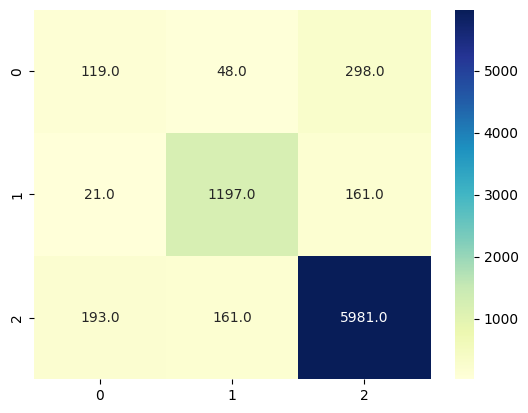

In [56]:
sns.heatmap(cn, annot = True, fmt=".1f", cmap="YlGnBu")

In [34]:
#Accuracy Score of our model
from sklearn. metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

0.8921628560948771


In [38]:
#Predicting the outcome
inp = "You are bad and I dont like you"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['no hate or offensive']


In [37]:
inp = "It is really awesome"
inp = cv. transform([inp]). toarray()
print(model. predict(inp))

['no hate or offensive']


In [57]:
inp = "let's unite and kill all the people who are protesting against government"
inp = cv. transform([inp]). toarray()
print(model. predict(inp))

['hate speech']
